Loaded dataset successfully!
   review_id product_id       product_name category  \
0          1      P1001  ComfyRun Sneakers    Shoes   
1          2      P1001  ComfyRun Sneakers    Shoes   
2          3      P1001  ComfyRun Sneakers    Shoes   
3          4      P1002    Everyday Hoodie  Apparel   
4          5      P1002    Everyday Hoodie  Apparel   

                                         review_text  rating        date  
0  Love these sneakers — very comfortable and sty...       5  2025-01-10  
1  Good cushioning but the sizing runs small. Con...       4  2025-01-12  
2  Soles wore out after two months of light use. ...       2  2025-03-05  
3          Warm and soft. Great color and fits well.       5  2025-02-02  
4  Nice fabric but the zipper got stuck after a w...       3  2025-02-15  


Device set to use cpu



Sentiment analysis complete!
        product_name                                        review_text  \
0  ComfyRun Sneakers  Love these sneakers — very comfortable and sty...   
1  ComfyRun Sneakers  Good cushioning but the sizing runs small. Con...   
2  ComfyRun Sneakers  Soles wore out after two months of light use. ...   
3    Everyday Hoodie          Warm and soft. Great color and fits well.   
4    Everyday Hoodie  Nice fabric but the zipper got stuck after a w...   

  sentiment  confidence  
0  Positive       1.000  
1  Negative       0.997  
2  Negative       1.000  
3  Positive       1.000  
4  Negative       0.998  


/tmp/ipython-input-1641160644.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="pastel")


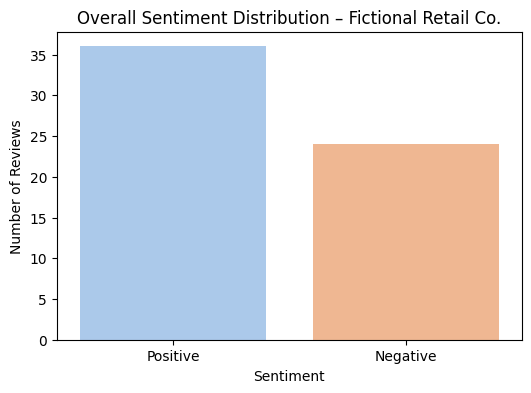

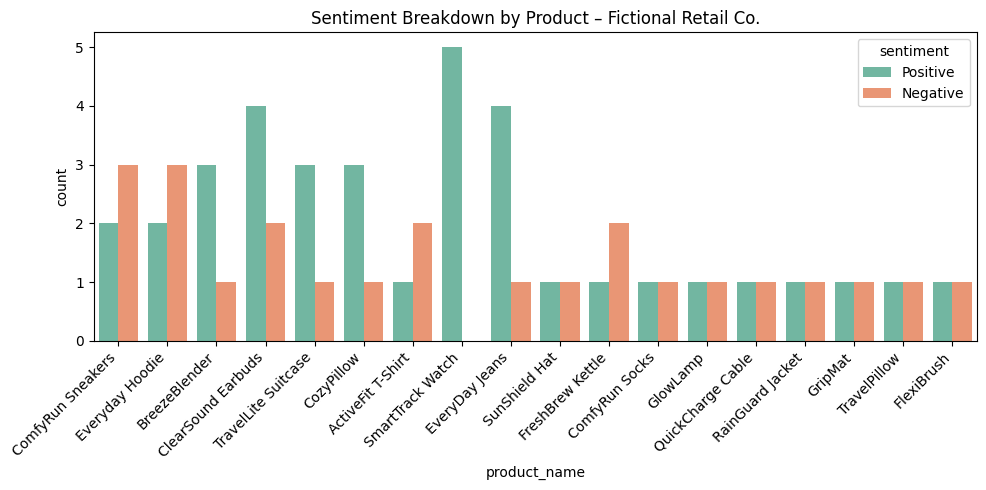

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [10]:
# ============================================================
# PROJECT OVERVIEW — Fictional Retail Co. Sentiment Analyzer
# ============================================================
# This project builds a Customer Review Sentiment Analyzer
# for Fictional Retail Co. using only free and open-source tools.
#
# The goal is to automatically understand whether a customer’s
# review is positive or negative using natural language models.
#
# Example:
# Fictional Retail Co. receives many online reviews like:
#   - “The delivery was fast and the shoes are super comfy!”
#   - “Customer service was rude and didn’t help with my return.”
#
# Our system reads these reviews and classifies them as:
#   → Positive
#   → Negative
#
# It also measures confidence, showing how sure the model is
# about its prediction.
#
# ============================================================
# SIMPLE EXPLANATION OF EACH STEP
# ============================================================
#
# Step 1 — Install the Tools
# We start by installing Python packages (libraries) that help
# us with language understanding and visualization:
#   - Transformers → to use a free Hugging Face sentiment model
#   - Torch → supports the model computations
#   - Pandas → to handle CSV data files (like spreadsheets)
#   - Matplotlib & Seaborn → to create simple visual charts
#   - Gradio → to make an interactive demo where you can test reviews
#
# Think of this step as setting up your “AI lab” before starting experiments.
#
# Step 2 — Load the Data
# We load a CSV file from the folder `/content/fictional_retail_docs`.
# The file (`fictional_retail_reviews.csv`) contains columns like:
#   - customer_id
#   - product_name
#   - review_text
#
# These are synthetic (fake) reviews for learning and demonstration only.
# If the file isn’t found, we show a clear error message to remind the user
# to upload it before running the notebook.
#
# Step 3 — Initialize the Free Sentiment Model
# We use the free Hugging Face model:
#   distilbert-base-uncased-finetuned-sst-2-english
#
# This model is lightweight and perfect for detecting whether a sentence
# expresses positive or negative emotion.
#
# You can think of it like a robot that reads each review and says:
#   “This sounds happy” or “This sounds upset.”
#
# Step 4 — Analyze Each Review
# We define a helper function called get_sentiment(text):
#   - It passes the review text to the model
#   - The model returns a label (POSITIVE / NEGATIVE)
#   - We also store the confidence score (0 to 1)
#
# We apply this function to all reviews in our dataset using Pandas.
# The result is two new columns:
#   → sentiment
#   → confidence
#
# Step 5 — Create a Simple Dashboard
# Now that each review has a sentiment, we visualize the results:
#   - Plot 1 → Overall Sentiment Distribution
#       Shows how many reviews are positive or negative overall.
#   - Plot 2 → Sentiment by Product
#       Compares positivity across different products.
#
# This gives a quick snapshot of what customers like or dislike.
#
# Step 6 — Build an Interactive Gradio Demo (Optional)
# To make the project more fun and user-friendly, we build a tiny web app
# using Gradio.
#
# You can type a review (for example, “The quality is great but delivery was late”)
# and get instant feedback like:
#   → Sentiment: Negative
#   → Confidence: 0.82
#
# This makes it perfect for presentations, teaching, or even
# for a basic proof-of-concept in a real business.
#
# ============================================================
# SYSTEM FLOW
# ============================================================
# 1. Load CSV file of customer reviews
# 2. Use transformer model to predict each review’s sentiment
# 3. Store results (sentiment + confidence) in a DataFrame
# 4. Visualize results with Seaborn/Matplotlib charts
# 5. (Optional) Let users test new reviews using Gradio interface
#
# ============================================================
# TOOLS USED (All Free)
# ============================================================
# - Hugging Face model: distilbert-base-uncased-finetuned-sst-2-english
# - Torch: backend for the model
# - Pandas: data management
# - Matplotlib / Seaborn: visualization
# - Gradio: for interactive demo
#
# Everything in this project is open-source and 100% free.
# No API keys, no paid cloud, and no private data.
# ============================================================


# ===============================================================
# STEP 1 – Install Dependencies
# ---------------------------------------------------------------
# Here, we install all Python libraries needed for this project.
# - transformers → to load pre-trained AI models
# - torch → backend for running the AI model
# - pandas → for reading and managing data
# - matplotlib + seaborn → for visual charts
# - gradio → for creating an interactive demo interface
# ===============================================================
!pip install --quiet transformers torch pandas matplotlib seaborn gradio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import gradio as gr
import os


# ===============================================================
# STEP 2 – Load Synthetic Review Data
# ---------------------------------------------------------------
# We’ll use a fictional dataset of customer reviews stored inside
# your Colab environment in this folder:
# /content/fictional_retail_docs
#
# The CSV file should contain columns like:
# - review_id
# - product_name
# - review_text
# - rating
#
# If the file isn’t found, the program will stop and show an error.
# ===============================================================
folder_path = "/content/fictional_retail_docs"
csv_path = os.path.join(folder_path, "fictional_retail_reviews.csv")

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Could not find {csv_path}. Please upload your CSV file first.")

# Load the file into a pandas DataFrame
df = pd.read_csv(csv_path)

print("Loaded dataset successfully!")
print(df.head())


# ===============================================================
# STEP 3 – Load a Free Pretrained Sentiment Model
# ---------------------------------------------------------------
# We use a small and efficient Hugging Face model:
# "distilbert-base-uncased-finetuned-sst-2-english"
#
# This model classifies text as POSITIVE or NEGATIVE.
# It’s fast, accurate, and free — perfect for small projects.
# ===============================================================
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)


# ===============================================================
# STEP 4 – Analyze Each Review
# ---------------------------------------------------------------
# The helper function below:
# - Takes a review text
# - Runs it through the model
# - Returns two things:
#   → Sentiment label (Positive or Negative)
#   → Confidence score (how sure the model is)
#
# We limit each review to 512 characters to prevent model overflow.
# ===============================================================
def get_sentiment(text):
    result = sentiment_analyzer(text[:512])[0]
    label = result['label']
    score = round(result['score'], 3)
    if label == "NEGATIVE":
        return "Negative", score
    else:
        return "Positive", score

# Apply the sentiment function to each review
df["sentiment"], df["confidence"] = zip(*df["review_text"].apply(get_sentiment))

print("\nSentiment analysis complete!")
print(df[["product_name", "review_text", "sentiment", "confidence"]].head())


# ===============================================================
# STEP 5 – Create a Simple Visualization Dashboard
# ---------------------------------------------------------------
# This section helps visualize sentiment results.
# We create two charts:
# 1. Overall sentiment distribution (positive vs negative)
# 2. Sentiment distribution by product
#
# These plots make it easy for managers to interpret insights.
# ===============================================================

# Plot 1: Overall sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment", palette="pastel")
plt.title("Overall Sentiment Distribution – Fictional Retail Co.")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Plot 2: Sentiment by product
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="product_name", hue="sentiment", palette="Set2")
plt.title("Sentiment Breakdown by Product – Fictional Retail Co.")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# ===============================================================
# STEP 6 – Build an Interactive Demo (Optional)
# ---------------------------------------------------------------
# Using Gradio, we create a mini web app that allows anyone to type
# a review and instantly get a sentiment prediction.
#
# This makes your project interactive and perfect for demos.
# ===============================================================

def analyze_review(text):
    label, score = get_sentiment(text)
    return f"Sentiment: {label}\nConfidence: {score}"

# Create the Gradio interface
demo = gr.Interface(
    fn=analyze_review,
    inputs=gr.Textbox(lines=4, placeholder="Type or paste a customer review here..."),
    outputs="text",
    title="Fictional Retail Co. – Sentiment Analyzer",
    description="Analyze customer feedback sentiment using a free AI model from Hugging Face."
)

# Launch the demo (set share=True if you want a public shareable link)
demo.launch(share=False)
